In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals
import keras
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
import seaborn as sns
import os
import re
import time
import pickle
import pdb
import pandas as pd
import sys
sns.set()

Using TensorFlow backend.
/Users/matt/anaconda3/envs/ML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/matt/anaconda3/envs/ML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/matt/anaconda3/envs/ML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/matt/anaconda3/envs/ML/lib/p

In [7]:
def reading_in_data(filename):

    filename = str(filename)

    infile = open(filename,'rb')
    new_dict = pickle.load(infile)
    infile.close()
    
    return new_dict

def var_sifting_data_dicts(input_dict_low, min_cut, max_cut):
    
    #input_dict_low = input_dict['LOW']
    
    # initial flux, label, wavelength, redshift, and noise for the stars and quasars
    init_flux = input_dict_low['FLUX']
    init_labels = input_dict_low['CLASS']
    init_wave = input_dict_low['WAVE']
    init_redshift = input_dict_low['REDSHIFT']
    init_noise = input_dict_low['NOISE']
    #init_fake_noise = input_dict_low['FAKE_NOISE']
    
    
    # empty lists to store the flux,labels, wavelength, redshift, and noise for the quasars & stars
    quasar_labels = []
    quasar_flux = []
    quasar_wave = []
    quasar_redshift = []
    quasar_noise = []
    #quasar_fake_noise = []
    
    star_labels = []
    star_flux = []
    star_wave = []
    star_redshift = []
    star_noise = []
    #star_fake_noise = []

    # check if the classifier actually came back as QSO and if so append to empty list
    for i in range(len(init_labels)):
        if (init_labels[i] == 'QSO')  & (min(init_wave[i]) <= min_cut) & \
        (max(init_wave[i]) >= max_cut):
            
            quasar_labels.append(init_labels[i])
            quasar_flux.append(init_flux[i])
            quasar_wave.append(init_wave[i])
            quasar_redshift.append(init_redshift[i])
            #quasar_noise.append(init_noise[i])
            
        else:
            pass
        
    
    # check if the classifier actually came back as star and if so append to empty list
    for i in range(len(init_labels)):
        if (init_labels[i] == 'STAR') & (min(init_wave[i]) <= min_cut) & \
        (max(init_wave[i]) >= max_cut) & (init_noise[i] <= 2.):
            
            star_labels.append(init_labels[i])
            star_flux.append(init_flux[i])
            star_wave.append(init_wave[i])
            star_redshift.append(init_redshift[i])
            star_noise.append(init_noise[i])
        else:
            pass
        
    data_dict = {'STAR_FLUX':star_flux, 'STAR_LABELS': star_labels, 'STAR_WAVE':star_wave, 'STAR_NOISE': star_noise,\
                 'STAR_REDSHIFT':star_redshift, 'QUASAR_FLUX':quasar_flux, 'QUASAR_LABELS':quasar_labels, \
                 'QUASAR_WAVE': quasar_wave, 'QUASAR_NOISE': quasar_noise, 'QUASAR_REDSHIFT': quasar_redshift}
    
    return data_dict

def low_sifting_data_dicts(input_dict_low, min_cut, max_cut):
    
    #input_dict_low = input_dict['LOW']
    
    # initial flux, label, wavelength, redshift, and noise for the stars and quasars
    init_flux = input_dict_low['FLUX']
    init_labels = input_dict_low['CLASS']
    init_wave = input_dict_low['WAVE']
    init_redshift = input_dict_low['REDSHIFT']
    init_noise = input_dict_low['NOISE']
    init_fake_noise = input_dict_low['FAKE_NOISE']
    
    
    # empty lists to store the flux,labels, wavelength, redshift, and noise for the quasars & stars
    quasar_labels = []
    quasar_flux = []
    quasar_wave = []
    quasar_redshift = []
    quasar_noise = []
    quasar_fake_noise = []
    
    star_labels = []
    star_flux = []
    star_wave = []
    star_redshift = []
    star_noise = []
    star_fake_noise = []

    # check if the classifier actually came back as QSO and if so append to empty list
    for i in range(len(init_labels)):
        if (init_labels[i] == 'QSO')  & (min(init_wave[i]) <= min_cut) & \
        (max(init_wave[i]) >= max_cut):
            
            quasar_labels.append(init_labels[i])
            quasar_flux.append(init_flux[i])
            quasar_wave.append(init_wave[i])
            quasar_redshift.append(init_redshift[i])
            quasar_noise.append(init_noise[i])
            quasar_fake_noise.append(init_fake_noise[i])

            
        else:
            pass
        
    
    # check if the classifier actually came back as star and if so append to empty list
    for i in range(len(init_labels)):
        if (init_labels[i] == 'STAR') & (min(init_wave[i]) <= min_cut) & \
        (max(init_wave[i]) >= max_cut) & (init_fake_noise[i] <= 2.):
            
            star_labels.append(init_labels[i])
            star_flux.append(init_flux[i])
            star_wave.append(init_wave[i])
            star_redshift.append(init_redshift[i])
            star_noise.append(init_noise[i])
            star_fake_noise.append(init_fake_noise[i])
        else:
            pass
        
    data_dict = {'STAR_FLUX':star_flux, 'STAR_LABELS': star_labels, 'STAR_WAVE':star_wave, 'STAR_NOISE': star_noise,\
                 'STAR_REDSHIFT':star_redshift, 'STAR_FAKE_NOISE': star_fake_noise, 'QUASAR_FLUX':quasar_flux,\
                 'QUASAR_LABELS':quasar_labels, 'QUASAR_WAVE': quasar_wave, 'QUASAR_NOISE': quasar_noise,\
                 'QUASAR_REDSHIFT': quasar_redshift, 'QUASAR_FAKE_NOISE': quasar_fake_noise}
    
    return data_dict

def high_sifting_data_dicts(input_dict, min_cut, max_cut):
    
    input_dict_high = input_dict['HIGH']
    
    # initial flux, label, wavelength, redshift, and noise for the stars and quasars
    init_flux = input_dict_high['FLUX']
    init_labels = input_dict_high['CLASS']
    init_wave = input_dict_high['WAVE']
    init_redshift = input_dict_high['REDSHIFT']
    init_noise = input_dict_high['NOISE']
    
    
    # empty lists to store the flux,labels, wavelength, redshift, and noise for the quasars & stars
    quasar_labels = []
    quasar_flux = []
    quasar_wave = []
    quasar_redshift = []
    quasar_noise = []
    
    star_labels = []
    star_flux = []
    star_wave = []
    star_redshift = []
    star_noise = []

    # check if the classifier actually came back as QSO and if so append to empty list
    for i in range(len(init_labels)):
        if (init_labels[i] == 'QSO')  & (min(init_wave[i]) <= min_cut) & \
        (max(init_wave[i]) >= max_cut) & (init_noise[i] >= 12.):
            
            quasar_labels.append(init_labels[i])
            quasar_flux.append(init_flux[i])
            quasar_wave.append(init_wave[i])
            quasar_redshift.append(init_redshift[i])
            quasar_noise.append(init_noise[i])
            
        else:
            pass
        
    
    # check if the classifier actually came back as star and if so append to empty list
    for i in range(len(init_labels)):
        if (init_labels[i] == 'STAR') & (min(init_wave[i]) <= min_cut) & \
        (max(init_wave[i]) >= max_cut) & (init_noise[i] >= 12.):
            
            star_labels.append(init_labels[i])
            star_flux.append(init_flux[i])
            star_wave.append(init_wave[i])
            star_redshift.append(init_redshift[i])
            star_noise.append(init_noise[i])
        else:
            pass
        
    data_dict = {'STAR_FLUX':star_flux, 'STAR_LABELS': star_labels, 'STAR_WAVE':star_wave, 'STAR_NOISE': star_noise,\
                 'STAR_REDSHIFT':star_redshift, 'QUASAR_FLUX':quasar_flux, 'QUASAR_LABELS':quasar_labels, \
                 'QUASAR_WAVE': quasar_wave, 'QUASAR_NOISE': quasar_noise, 'QUASAR_REDSHIFT': quasar_redshift}
    
    return data_dict    
    
    
def balancing_data(data_dict):
    
    q_flux = data_dict['QUASAR_FLUX']
    q_wave = data_dict['QUASAR_WAVE']
    q_labels = data_dict['QUASAR_LABELS']
    q_noise = data_dict['QUASAR_NOISE']
    q_redshift = data_dict['QUASAR_REDSHIFT']
    q_fake_noise = data_dict['QUASAR_FAKE_NOISE']
    
    s_flux = data_dict['STAR_FLUX']
    s_wave = data_dict['STAR_WAVE']
    s_labels = data_dict['STAR_LABELS']
    s_noise = data_dict['STAR_NOISE']
    s_redshift = data_dict['STAR_REDSHIFT']
    s_fake_noise = data_dict['STAR_FAKE_NOISE']
    
    if (len(s_labels)) > (len(q_labels)):
        
        cut_s_flux = s_flux[:len(q_labels)]
        cut_s_wave = s_wave[:len(q_labels)]
        cut_s_labels = s_labels[:len(q_labels)]
        cut_s_noise = s_noise[:len(q_labels)]
        cut_s_redshift = s_redshift[:len(q_labels)]
        cut_s_fake_noise = s_fake_noise[:len(q_labels)]
        
        cut_q_flux = q_flux
        cut_q_wave = q_wave
        cut_q_labels = q_labels
        cut_q_noise = q_noise
        cut_q_redshift = q_redshift
        cut_q_fake_noise = q_fake_noise
        
    elif (len(s_labels)) < (len(q_labels)):
        
        cut_q_flux = q_flux[:len(s_labels)]
        cut_q_wave = q_wave[:len(s_labels)]
        cut_q_labels = q_labels[:len(s_labels)]
        cut_q_noise = q_noise[:len(s_labels)]
        cut_q_redshift = q_redshift[:len(s_labels)]
        cut_q_fake_noise = q_fake_noise[:len(s_labels)]
        
        cut_s_flux = s_flux
        cut_s_wave = s_wave
        cut_s_labels = s_labels
        cut_s_noise = s_noise
        cut_s_redshift = s_redshift
        cut_s_fake_noise = s_fake_noise
        
    cut_data_dict = {'STAR_FLUX': cut_s_flux, 'STAR_LABELS': cut_s_labels, 'STAR_WAVE':cut_s_wave,\
                     'STAR_NOISE': cut_s_noise,'STAR_REDSHIFT':cut_s_redshift,'STAR_FAKE_NOISE': cut_s_fake_noise,\
                     'QUASAR_FLUX':cut_q_flux, 'QUASAR_LABELS':cut_q_labels, 'QUASAR_WAVE':cut_q_wave,\
                     'QUASAR_NOISE': cut_q_noise, 'QUASAR_REDSHIFT': cut_q_redshift, 'QUASAR_FAKE_NOISE': cut_q_fake_noise}
    
    return cut_data_dict
        
        
def randomizing_data(data_dict, cut_len, permutation):
    
    quasar_flux = data_dict['QUASAR_FLUX'][:cut_len]
    quasar_labels = data_dict['QUASAR_LABELS'][:cut_len]
    quasar_wave = data_dict['QUASAR_WAVE'][:cut_len]
    quasar_noise = data_dict['QUASAR_NOISE'][:cut_len]
    quasar_redshift = data_dict['QUASAR_REDSHIFT'][:cut_len]
    quasar_fake_noise = data_dict['QUASAR_FAKE_NOISE'][:cut_len]
    
    star_flux = data_dict['STAR_FLUX'][:cut_len]
    star_labels = data_dict['STAR_LABELS'][:cut_len] 
    star_wave = data_dict['STAR_WAVE'][:cut_len]
    star_noise = data_dict['STAR_NOISE'][:cut_len]
    star_redshift = data_dict['STAR_REDSHIFT'][:cut_len]
    star_fake_noise = data_dict['STAR_FAKE_NOISE'][:cut_len]

    star_labels = np.ones(len(star_labels))   # STARS = 1
    quasar_labels = np.zeros(len(quasar_labels)) # QUASARS = 0
    
    input_flux = star_flux + quasar_flux
    input_flux = np.asarray(input_flux)
    
    input_labels = np.concatenate((star_labels,quasar_labels), axis = 0)
    
    input_wave = star_wave + quasar_wave
    input_wave = np.asarray(input_wave)
    
    input_noise = star_noise + quasar_noise
    input_noise = np.asarray(input_noise)
    
    input_redshift = star_redshift+ quasar_redshift
    input_redshift = np.asarray(input_redshift)
    
    input_fake_noise = star_fake_noise + quasar_fake_noise
    input_fake_noise = np.asarray(input_fake_noise)
    
    permutation = np.random.permutation(len(input_flux)) # creates the same permutation to be done on flux & labels
    
    # needs to be array to permute for classification
    randomized_flux = input_flux[permutation] 
    randomized_labels = input_labels[permutation]
    randomized_wave = input_wave[permutation]
    randomized_noise = input_noise[permutation]
    randomized_redshift = input_redshift[permutation]
    randomized_fake_noise = input_fake_noise[permutation]

    randomized_flux = randomized_flux.tolist() # needs to be a list to be used in creating tensor function
    
    randomized_data = {'FLUX': randomized_flux, 'LABELS': randomized_labels, 'WAVE': randomized_wave,\
                      'NOISE': randomized_noise, 'REDSHIFT': randomized_redshift, 'PERMUTATION': permutation,\
                      'FAKE_NOISE': randomized_fake_noise}
    
    return randomized_data


def normalizing_data(data_dict):
    
    flux = data_dict['FLUX']
    labels = data_dict['LABELS']
    wave = data_dict['WAVE']
    redshift = data_dict['REDSHIFT']
    noise = data_dict['NOISE']
    fake_noise = data_dict['FAKE_NOISE']
    
    max_flux = []
    normalized_flux = []

    for i in range(len(flux)):
    
        max_flux.append(max(flux[i]))
        
        edited_flux = flux[i]/max_flux[i]
    
        normalized_flux.append(edited_flux)
        
    data = {'FLUX': normalized_flux, 'LABELS': labels, 'WAVE': wave, 'REDSHIFT': redshift, 'NOISE': noise,\
           'FAKE_NOISE': fake_noise}
    
    return data

def creating_image_dims(data_dict):
    
    flux = data_dict['FLUX']
    wave = data_dict['WAVE']
    labels = data_dict['LABELS']
    redshift = data_dict['REDSHIFT']
    noise = data_dict['NOISE']
    fake_noise = data_dict['FAKE_NOISE']
    cut_spec = []
    cut_wave = []
    
    for i in range(len(flux)): # 3.5817
        spec = flux[i]
        wavelength = wave[i]
        keepidx, = np.where((wave[i] > 3.5818) & (wave[i] < 3.95))
        cut_spec.append(spec[keepidx])
        cut_wave.append(wavelength[keepidx])
    
    data = {'FLUX': cut_spec, 'LABELS': labels, 'WAVE': cut_wave, 'REDSHIFT': redshift, 'NOISE': noise,\
           'FAKE_NOISE': fake_noise} #'FLUX': speclen_same
    
    return data



def creating_input_tensor(samples, height , width , channels , data_dict):
    
    # creates input tensor of correct dimensions
    input_tensor = np.ones((samples, height, width, channels))
    
    # brings in preprocessed data to input into the dimensions of the tensor
    processed_data = creating_image_dims(data_dict)
    
    # creating the list of the same length fluxs
    fluxlen_same = processed_data['FLUX']
    
    # putting the length of the fluxs lists into the first axis of the tensor, while filling the 3rd axis
    # with that specific samples flux array
    for i in range(samples):
        spec = fluxlen_same[i]
        input_tensor[i,0,:,0] = spec[:]
        
        
    data = {'IMAGES': input_tensor, 'LABELS': processed_data['LABELS'], 'NOISE': processed_data['NOISE'],\
           'FLUX': data_dict['FLUX'], 'WAVE': data_dict['WAVE'], 'REDSHIFT': data_dict['REDSHIFT'],\
           'FAKE_NOISE': data_dict['FAKE_NOISE']}
        
    return data


def save_as_pickled_object(obj, filepath):
    """
    This is a defensive way to write pickle.write, allowing for very large files on all platforms
    """
    max_bytes = 2**31 - 1
    bytes_out = pickle.dumps(obj)
    n_bytes = sys.getsizeof(bytes_out)
    with open(filepath, 'wb') as f_out:
        for idx in range(0, n_bytes, max_bytes):
            f_out.write(bytes_out[idx:idx+max_bytes])

In [8]:
fake_star_dict = pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/joined_obj_dicts/fake_data_dict")
#var_star_dict = pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/joined_obj_dicts/varstar_dict")

permutation = pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/permutation/var_star_permutation")


In [10]:
#var_star_dict['LOW'].keys()

In [ ]:
low_sifted_fake_star_dict = low_sifting_data_dicts(fake_star_dict['LOW'], 3.5818, 3.95)

#low_sifted_var_star_dict = var_sifting_data_dicts(var_star_dict['LOW'], 3.5818, 3.95)


In [ ]:
#pdb.pm()

In [12]:
print(len(low_sifted_fake_star_dict['STAR_LABELS']))
print(len(low_sifted_fake_star_dict['QUASAR_LABELS']))

print(len(permutation))

2443
2430
4910


In [13]:
low_bal_sifted_fake_star_dict = balancing_data(low_sifted_fake_star_dict)

#low_bal_sifted_var_star_dict = balancing_data(low_sifted_var_star_dict)

In [14]:
q_labels = low_bal_sifted_fake_star_dict['QUASAR_LABELS']
s_labels = low_bal_sifted_fake_star_dict['STAR_LABELS']

q_noise = low_bal_sifted_fake_star_dict['QUASAR_NOISE']
s_noise = low_bal_sifted_fake_star_dict['STAR_NOISE']

In [15]:
print(len(q_labels))
print(len(s_labels))

2430
2430


In [16]:
print(len(permutation))
# print(permutation_fake)

4910


In [17]:
low_randomized_fake_star = randomizing_data(low_bal_sifted_fake_star_dict, 2455, permutation) # 

#low_randomized_var_star = randomizing_data(low_bal_sifted_var_star_dict, 2455, permutation) # 


In [18]:
#pdb.pm()

In [19]:
low_randomized_fake_star.keys()

dict_keys(['FLUX', 'LABELS', 'WAVE', 'NOISE', 'REDSHIFT', 'PERMUTATION', 'FAKE_NOISE'])

In [20]:
len(low_randomized_fake_star['LABELS'])

4860

In [21]:
low_normalized_fake_star = normalizing_data(low_randomized_fake_star)

#low_normalized_var_star = normalizing_data(low_randomized_var_star)

In [22]:
print(len(low_normalized_fake_star['LABELS']))
#print(len(low_normalized_quasar_star['LABELS']))
#print(len(low_normalized_var_star['LABELS']))

4860


In [23]:
#plt.plot(high_normalized_quasar_star['WAVE'][1], high_normalized_quasar_star['FLUX'][1] )

# print(len(low_normalized_fake_star['WAVE'][1]))
# print(len(low_normalized_fake_star['FLUX'][1]))
# print(low_normalized_fake_star['LABELS'][1])

In [24]:
print(np.argmax(low_normalized_fake_star['REDSHIFT']))
print(np.argmin(low_normalized_fake_star['REDSHIFT']))

4466
833


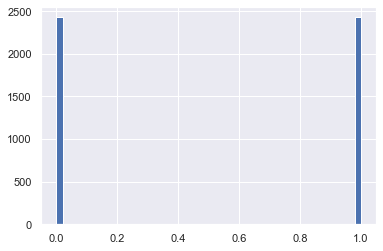

In [25]:
a,b,c = plt.hist(low_normalized_fake_star['LABELS'], bins = 50)

In [26]:
low_fake_star_image_data = creating_image_dims(low_normalized_fake_star)

#low_var_star_image_data = creating_image_dims(low_normalized_var_star)

In [27]:
# wave = var_star_image_data['WAVE']
# flux = var_star_image_data['FLUX']
# label = var_star_image_data['LABELS']
# z = var_star_image_data['REDSHIFT']

# # 1 is star, 0 is quasar

# #plt.plot(wave[17], flux[17], label = "It is a "+str(label[17])+" with a redshift of "+str(z[17]))
# plt.plot(10**wave[7000], flux[7000], label = "It is a "+str(label[7000])+" with a redshift of "+str(z[7000]))  
# plt.legend()

In [28]:
low_fake_star_input_data = creating_input_tensor(4860, 1, 3681 , 1,\
                                   low_fake_star_image_data)

In [29]:
save_as_pickled_object(low_fake_star_input_data, "/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/corrected_preprocessed_joined_obj_dict/low_fake_star_input_data" )


In [ ]:
a,b,c = plt.hist(np.asarray(low_fake_star_input_data['LABELS']), bins = 50)

In [ ]:
np.shape(low_fake_star_input_data['IMAGES'])

In [ ]:
plt.plot(low_fake_star_input_data['WAVE'][4174], low_fake_star_input_data['FLUX'][4174])
print(len(low_fake_star_input_data['FLUX'][0]))

In [ ]:
var_star_preprocessed_data_low = pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/corrected_preprocessed_joined_obj_dict/var_star_preprocessed_data_low")


In [ ]:
var_labels = var_star_preprocessed_data_low['LABELS']

fake_labels = low_fake_star_input_data['LABELS']

In [ ]:
plt.plot(var_star_preprocessed_data_low['WAVE'][0],var_star_preprocessed_data_low['FLUX'][0])
plt.plot(low_fake_star_input_data['WAVE'][0], low_fake_star_input_data['FLUX'][0], alpha = 0.6)


In [ ]:
print(var_labels[4174:4910])
print(fake_labels[4174:4910])

In [ ]:

# save_data_to_disk('quasar_star_preprocessed_data_high', high_quasar_star_input_data)


# save_data_to_disk('quasar_star_preprocessed_data_low', low_quasar_star_input_data)
